In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define data directories
train_data_dir = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Training"
test_data_dir = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing"

# Set hyperparameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 10
learning_rate = 0.001


In [7]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')


Found 2870 images belonging to 4 classes.


In [8]:
# Data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the testing data
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='categorical')


Found 2870 images belonging to 4 classes.


In [9]:
# Build the CNN and DNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [10]:
# Compile the model with learning rate scheduler
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Set up learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


In [12]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs,
                    validation_data=test_generator, validation_steps=test_generator.samples // batch_size,
                    callbacks=[reduce_lr])


Epoch 1/10
89/89 [==============================] - 81s 888ms/step - loss: 1.2412 - accuracy: 0.4323 - val_loss: 0.9338 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 2/10
89/89 [==============================] - 80s 894ms/step - loss: 0.9578 - accuracy: 0.5860 - val_loss: 0.7351 - val_accuracy: 0.7086 - lr: 0.0010
Epoch 3/10
89/89 [==============================] - 78s 878ms/step - loss: 0.8251 - accuracy: 0.6536 - val_loss: 0.5982 - val_accuracy: 0.7711 - lr: 0.0010
Epoch 4/10
89/89 [==============================] - 81s 914ms/step - loss: 0.7536 - accuracy: 0.6797 - val_loss: 0.7027 - val_accuracy: 0.6889 - lr: 0.0010
Epoch 5/10
89/89 [==============================] - 82s 919ms/step - loss: 0.6778 - accuracy: 0.7023 - val_loss: 0.4679 - val_accuracy: 0.8041 - lr: 0.0010
Epoch 6/10
89/89 [==============================] - 76s 856ms/step - loss: 0.6354 - accuracy: 0.7308 - val_loss: 0.5143 - val_accuracy: 0.7841 - lr: 0.0010
Epoch 7/10
89/89 [==============================] - 76s 857ms/st

In [13]:
# Save the model
model.save('brain_tumor_classification_model.h5')

# Evaluate the model on testing data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 15s 166ms/step - loss: 0.2978 - accuracy: 0.8805
Test loss: 0.2978, Test accuracy: 0.8805


1/1 [==============================] - 0s 46ms/step


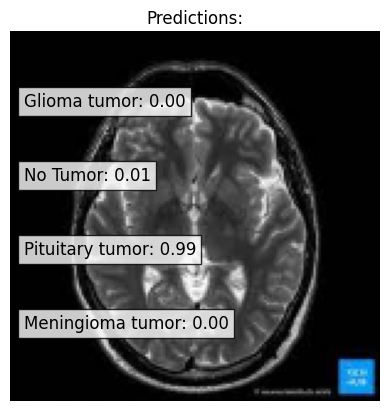

In [39]:
import matplotlib.pyplot as plt
import cv2

def plot_prediction(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess the image for prediction
    img = cv2.resize(img, (img_width, img_height))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Get the prediction
    prediction = model.predict(img)
    tumor_classes = ['Glioma tumor', 'No Tumor', 'Pituitary tumor', 'Meningioma tumor']
    
    # Plot the image and all predictions
    plt.imshow(img[0])
    plt.title('Predictions:')
    plt.axis('off')
    for idx, class_label in enumerate(tumor_classes):
        probability = prediction[0][idx]
        plt.text(5, 30 + idx * 30, f'{class_label}: {probability:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

# Replace 'YOUR_IMAGE_PATH' with the path to the image you want to test
image_path_to_test = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\affectedbrain.jpg"
plot_prediction(image_path_to_test)


# glioma tumor - C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing\glioma_tumor\image(17).jpg
# meningioma tumor - C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing\meningioma_tumor\image(9).jpg
# no tumor - C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing\no_tumor\image(13).jpg
# pituitary tumor - C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing\pituitary_tumor\image(21).jpg
